## Data reference:
##### https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation

In [1]:
import zipfile

try:
    with zipfile.ZipFile('./archive.zip', 'r') as zip_dir:
        zip_dir.extractall('./data')
except:
    print("Already extracted or no data")

In [2]:
from os import listdir

data = listdir('./data')
data

['valid', 'train', 'test', 'README.txt']

In [3]:
from os.path import isfile, join

train_files = [f for f in listdir('./data/train') if isfile(join('./data/train', f))]
test_files = [f for f in listdir('./data/test') if isfile(join('./data/test', f))]

print(f"train amount of images: {len(train_files)}, test amount of images:{len(test_files)}")

train amount of images: 1503, test amount of images:216


In [4]:
%matplotlib inline

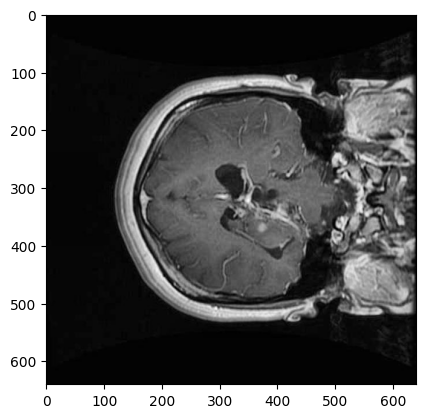

In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rand_train_img = random.choice(train_files)
rand_train_img = mpimg.imread(f"./data/train/{rand_train_img}")

plt.imshow(rand_train_img)
plt.show()

In [6]:
import json

IMG = []

with open('./data/train/_annotations.coco.json') as f:
    train_json = json.load(f)
    for img in train_json['images']:
        IMG.append({"id": img['id'], "file_name": img['file_name']})

IMG

[{'id': 0, 'file_name': '2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg'},
 {'id': 1, 'file_name': '2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg'},
 {'id': 2, 'file_name': '2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg'},
 {'id': 3, 'file_name': '2777_jpg.rf.3b60ea7f7e70552e70e41528052018bd.jpg'},
 {'id': 4, 'file_name': '2860_jpg.rf.3bb87fa4f938af5abfb1e17676ec1dad.jpg'},
 {'id': 5, 'file_name': '2161_jpg.rf.3be4125d1ffe011c0ed462d9fe0d2152.jpg'},
 {'id': 6, 'file_name': '2265_jpg.rf.3c62c7b8825039fab853256f9a9fe141.jpg'},
 {'id': 7, 'file_name': '1491_jpg.rf.3c658e83538de0fa5a3f4e13d7d85f12.jpg'},
 {'id': 8, 'file_name': '1385_jpg.rf.3c67cb92e2922dba0e6dba86f69df40b.jpg'},
 {'id': 9, 'file_name': '2534_jpg.rf.3c8c86666860368d46b8f7bcd95ac220.jpg'},
 {'id': 10, 'file_name': '2433_jpg.rf.3cdf8e4cb3a08e9b2fccc6c6082c2344.jpg'},
 {'id': 11, 'file_name': '1550_jpg.rf.3d067be9580ec32dbee5a89c675d8459.jpg'},
 {'id': 12, 'file_name': '2076_jpg.rf.3d43cf72261974fe3f574590e781b8f4.jpg

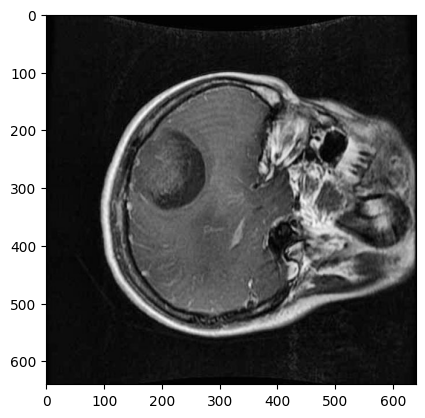

In [7]:
# 1'st image in list
img = mpimg.imread(f"./data/train/{IMG[2]['file_name']}") 
plt.imshow(img)
plt.show()

In [8]:
ANN = []

with open('./data/train/_annotations.coco.json') as f:
    train_json = json.load(f)
    for ann in train_json['annotations']:
        ANN.append({
            "img_id": ann['image_id'],
            "bbox": ann['bbox'],
            "seg": ann['segmentation']
        })

ANN

[{'img_id': 0,
  'bbox': [145, 239, 168.75, 162.5],
  'seg': [[313.75,
    238.75,
    145,
    238.75,
    145,
    401.25,
    313.75,
    401.25,
    313.75,
    238.75]]},
 {'img_id': 1,
  'bbox': [194, 176, 148.75, 233.75],
  'seg': [[342.5,
    176.25,
    193.75,
    176.25,
    193.75,
    410,
    342.5,
    410,
    342.5,
    176.25]]},
 {'img_id': 2,
  'bbox': [133, 173, 162.5, 185],
  'seg': [[295, 172.5, 132.5, 172.5, 132.5, 357.5, 295, 357.5, 295, 172.5]]},
 {'img_id': 3,
  'bbox': [245, 358, 138.75, 166.25],
  'seg': [[383.75,
    357.5,
    245,
    357.5,
    245,
    523.75,
    383.75,
    523.75,
    383.75,
    357.5]]},
 {'img_id': 4,
  'bbox': [80, 189, 112.5, 132.5],
  'seg': [[192.5,
    188.75,
    80,
    188.75,
    80,
    321.25,
    192.5,
    321.25,
    192.5,
    188.75]]},
 {'img_id': 5,
  'bbox': [293, 150, 182.5, 135],
  'seg': [[475, 150, 292.5, 150, 292.5, 285, 475, 285, 475, 150]]},
 {'img_id': 6,
  'bbox': [199, 165, 171.25, 133.75],
  'seg': [

In [9]:
def get_img_by_id(ann_img_id: int, IMG):
    for img in IMG:
        if img['id'] == ann_img_id:
            return img['file_name']

In [10]:
res = get_img_by_id(1, IMG)
res == IMG[1]['file_name']

True

In [11]:
for img in ANN:
    img['file_name'] = get_img_by_id(img['img_id'], IMG)

ANN[1]

{'img_id': 1,
 'bbox': [194, 176, 148.75, 233.75],
 'seg': [[342.5,
   176.25,
   193.75,
   176.25,
   193.75,
   410,
   342.5,
   410,
   342.5,
   176.25]],
 'file_name': '2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg'}

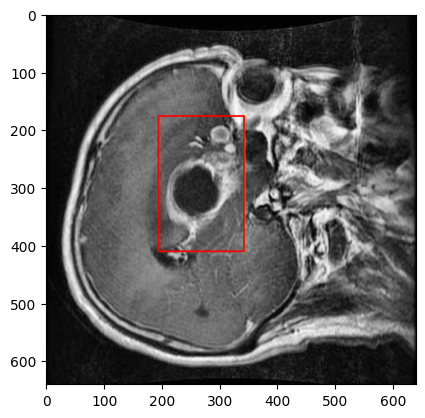

In [12]:
import cv2
import numpy as np

IMG_ID = 1
ann_img_data = ANN[IMG_ID]

img = cv2.imread(f"./data/train/{ann_img_data['file_name']}")

color = (0, 255, 0)

bbox = ann_img_data['bbox']
seg = ann_img_data['seg']

x, y, w, h = map(int, map(round, bbox))
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

flattened_seg = [round(coord) for point in seg for coord in point]
points = np.array(flattened_seg, np.int32).reshape((-1, 1, 2))

cv2.polylines(img, [points], isClosed=True, color=(0, 0, 255), thickness=2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()